In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("../Datasets/28-urban_pedestrian_locations_with_labels.csv")
df

,x_position,y_position,true_cluster
0,0.830586,-0.447733,1
1,0.701678,0.816918,0
2,1.022080,-0.492571,1
3,-0.316765,0.953438,0
4,0.293226,1.057185,0
...,...,...,...
495,0.239754,0.985462,0
496,0.072145,0.184834,1
497,0.590273,-0.365577,1
498,1.619465,-0.283658,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   x_position    500 non-null    float64
 1   y_position    500 non-null    float64
 2   true_cluster  500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


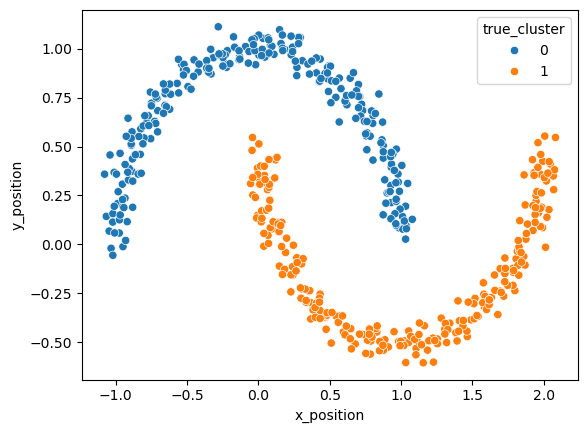

In [6]:
sns.scatterplot(x=df["x_position"],y=df["y_position"],hue=df["true_cluster"])
plt.show()

In [7]:
df = df.drop("true_cluster",axis=1)

In [8]:
df

,x_position,y_position
0,0.830586,-0.447733
1,0.701678,0.816918
2,1.022080,-0.492571
3,-0.316765,0.953438
4,0.293226,1.057185
...,...,...
495,0.239754,0.985462
496,0.072145,0.184834
497,0.590273,-0.365577
498,1.619465,-0.283658


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(df) 

In [11]:
from sklearn.cluster import DBSCAN

In [12]:
dbscan = DBSCAN()

In [13]:
dbscan.fit(X)

DBSCAN()

In [14]:
dbscan.labels_

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

In [15]:
X = pd.DataFrame(X,columns=["x_position","y_poisiton"])

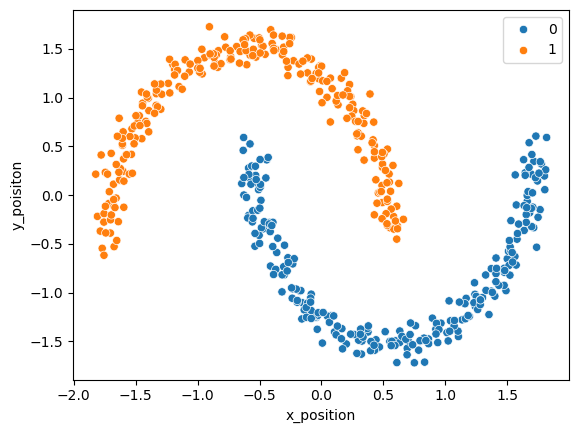

In [16]:
sns.scatterplot(x=X["x_position"],y=X["y_poisiton"],hue=dbscan.labels_)
plt.show()

In [19]:
# Hyperparameter grids
eps_values = [0.1,0.2,0.3,0.4,0.5,0.6]
min_samples_values = [4,5,6]

In [21]:
results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        labels = db.labels_
        # sadece 1 küme bulunduysa atla
        if len(set(labels)) <= 1:
            continue
        
        silhouette = silhouette_score(X, labels)
        
        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'Silhouette': silhouette,
            'n_clusters': len(set(labels)) - (1 if -1 in labels else 0) # eğer hiçbir şey bulamamışsa -1 yazar
        })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Silhouette', ascending=False)

In [22]:
results_df

,eps,min_samples,Silhouette,n_clusters
9,0.4,4,0.389338,2
10,0.4,5,0.389338,2
16,0.6,5,0.389338,2
15,0.6,4,0.389338,2
14,0.5,6,0.389338,2
13,0.5,5,0.389338,2
12,0.5,4,0.389338,2
11,0.4,6,0.389338,2
17,0.6,6,0.389338,2
8,0.3,6,0.389338,2


In [23]:
from sklearn.cluster import HDBSCAN

In [24]:
hdbscan = HDBSCAN()

In [25]:
hdbscan.fit(X)

HDBSCAN()

In [26]:
hdbscan.labels_

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

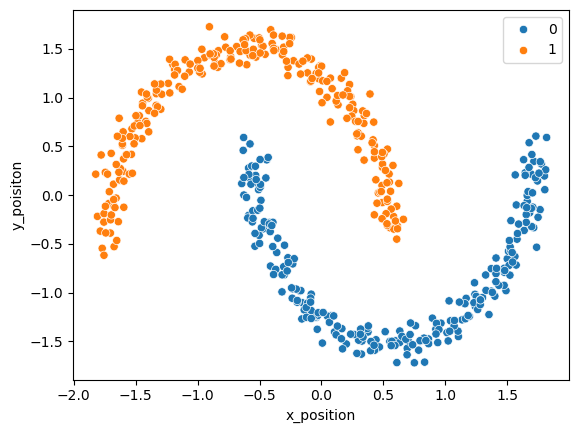

In [27]:
sns.scatterplot(x=X["x_position"],y=X["y_poisiton"],hue=hdbscan.labels_)
plt.show()